In [ ]:
# Siddharth Nagepalli 210968074
# Batch 3
# Week 5
# Exercise 1

In [ ]:
# Exercise 1 – Descriptive Analytics and Visualization using Matplotlib, Seaborn: (Cross tabulation,
# distributions, Multi-variate analysis, Various Plots)

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

# Importing Deliveries data set 

In [35]:
df1=pd.read_csv("deliveries.csv")
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# Data Cleaning for deliveries data set

In [36]:
df1.isnull().any()

match_id            False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed     True
dismissal_kind       True
fielder              True
dtype: bool

In [37]:
df1['player_dismissed'].fillna('no player dismissed',inplace=True)


In [38]:
df1['dismissal_kind'].fillna('not out',inplace=True)

In [39]:
df1['fielder'].fillna('not out',inplace=True)
df1.dropna(subset=['total_runs'],inplace=True)


In [40]:
df1.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)

In [41]:
df1.rename(columns={'match_id':'id'},inplace=True)


In [42]:
df1.isnull().any()

id                  False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed    False
dismissal_kind      False
fielder             False
dtype: bool

In [43]:
df1

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,no player dismissed,not out,not out
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,no player dismissed,not out,not out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,no player dismissed,not out,not out
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,no player dismissed,not out,not out
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,no player dismissed,not out,not out


# Importing matches dataset

In [44]:
df2=pd.read_csv("matches.csv") 
df2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# Data Cleaning for matches data set

In [45]:
df2.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [46]:
df2.replace("Rising Pune Supergiant","Rising Pune Supergiants",inplace=True)

In [47]:
df2.dropna(subset=['city'],inplace=True)
df2['winner'].fillna('no winner',inplace=True)
df2['player_of_match'].fillna('no player of match',inplace=True)
df2['umpire1'].fillna('no first umpire',inplace=True)
df2['umpire2'].fillna('no second umpire',inplace=True)
df2['umpire3'].fillna('no third umpire',inplace=True)


In [48]:
df2.isnull().any()

id                 False
season             False
city               False
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner             False
win_by_runs        False
win_by_wickets     False
player_of_match    False
venue              False
umpire1            False
umpire2            False
umpire3            False
dtype: bool

# 1) Count the total number of matches conducted in the year 2008

In [49]:
x=df2['season'].loc[df2['season']==2008]
x.count()

58

# 2) Find the city name where maximum and minimum number of matches conducted

In [50]:
x=df2['city'].value_counts().idxmax()
print('city with maximum number of matches=', x)

y=df2['city'].value_counts().idxmin()
print('city with minimum number of matches=', y)

city with maximum number of matches= Mumbai
city with minimum number of matches= Bloemfontein


# 3) Find total count of matches city wise.

In [51]:
df2['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

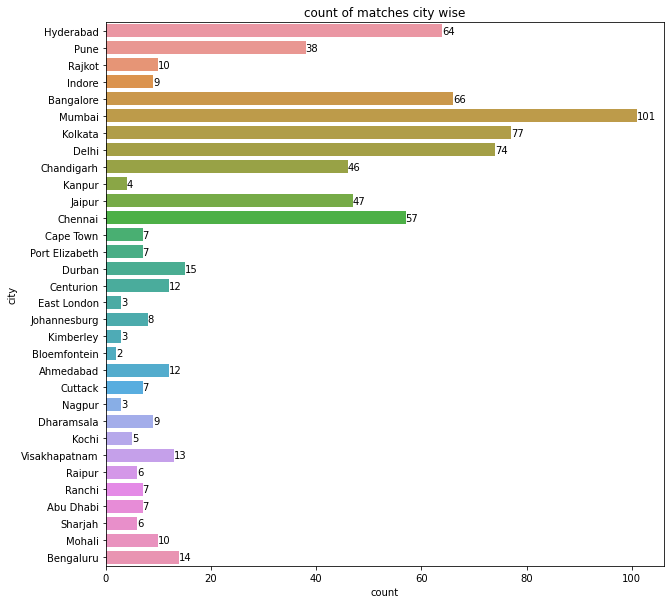

In [157]:
plt.figure(figsize=(10,10))
plt.title('count of matches city wise')
plot=sns.countplot(y='city',data=df2)
plot.bar_label(plot.containers[0])
plt.show()

# 4) Find the Team which is maximum and minimum toss winner.

In [53]:
x=df2['toss_winner'].value_counts().idxmax()
print('Team with maximum toss wins is =',x)
y=df2['toss_winner'].value_counts().idxmin()
print('Team with minimum toss wins is =',y)

Team with maximum toss wins is = Mumbai Indians
Team with minimum toss wins is = Kochi Tuskers Kerala


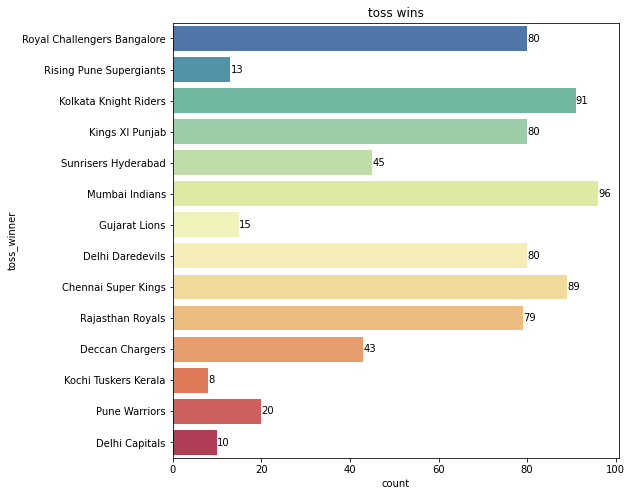

In [155]:
plt.figure(figsize=(8,8))
plot=sns.countplot(y='toss_winner',data=df2,palette='Spectral_r')
plot.bar_label(plot.containers[0])
plt.title('toss wins')
plt.show()

# 5) Check the toss decision that the team has take

toss decision taken by mumbai indians : 
field    53
bat      43
Name: toss_decision, dtype: int64


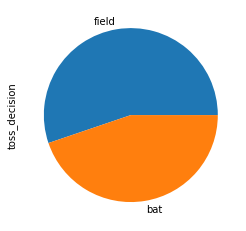

In [54]:
print('toss decision taken by mumbai indians : ')
x=df2['toss_decision'].loc[df2['toss_winner']=='Mumbai Indians']
y=x.value_counts()
print(y)
y.plot.pie()
plt.show()

toss decision taken by Kochi Tuskers Kerala : 
field    5
bat      3
Name: toss_decision, dtype: int64


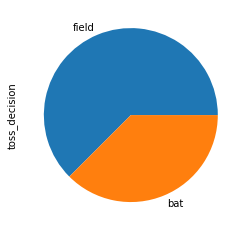

In [55]:
print('toss decision taken by Kochi Tuskers Kerala : ')
x=df2['toss_decision'].loc[df2['toss_winner']=='Kochi Tuskers Kerala']
y=x.value_counts()
print(y)
y.plot.pie()
plt.show()

# 6) Count the total number of normal and tie matches.

In [56]:
df2['result'].value_counts()

normal       736
tie            9
no result      4
Name: result, dtype: int64

In [57]:
x=df2['result'].loc[df2['result']=='normal']
count=x.count()
print('total number of normal matches are = ',count)

y=df2['result'].loc[df2['result']=='tie']
count1=y.count()
print('total number of tied matches are = ',count1)

total number of normal matches are =  736
total number of tied matches are =  9


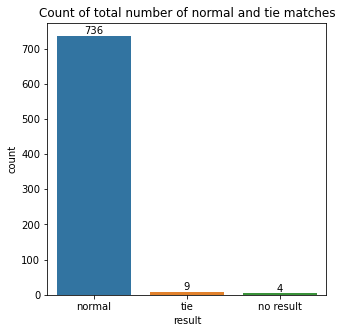

In [154]:
plt.figure(figsize=(5,5))
plot=sns.countplot(x='result',data=df2)
plot.bar_label(plot.containers[0])
plt.title('Count of total number of normal and tie matches')
plt.show()

# 7) Find the team names where the match result is tie

In [59]:
df2[['team1','team2','result']].loc[df2['result']=='tie']

,team1,team2,result
33,Gujarat Lions,Mumbai Indians,tie
125,Rajasthan Royals,Kolkata Knight Riders,tie
189,Kings XI Punjab,Chennai Super Kings,tie
387,Royal Challengers Bangalore,Sunrisers Hyderabad,tie
400,Delhi Daredevils,Royal Challengers Bangalore,tie
475,Rajasthan Royals,Kolkata Knight Riders,tie
535,Rajasthan Royals,Kings XI Punjab,tie
705,Kolkata Knight Riders,Delhi Capitals,tie
746,Mumbai Indians,Sunrisers Hyderabad,tie


# 8) Find the team name who won the match by highest runs

In [60]:
x=df2['winner'].loc[df2['win_by_runs'].idxmax()]
print('team who won the match by highest runs',x)

y=df2['win_by_runs'].loc[df2['win_by_runs'].idxmax()]
print(x,'won by',y,'runs')

team who won the match by highest runs Mumbai Indians
Mumbai Indians won by 146 runs


# 9) Find the team name who won the match by lowest runs.


In [61]:
df3=df2.loc[df2['win_by_runs']!=0]

y=df3['win_by_runs'].loc[df3['win_by_runs'].idxmin()]
print('lowest runs by which teams have won the match is = ',y)

x=df3['winner'].loc[df3['win_by_runs']==y]
x.value_counts()


lowest runs by which teams have won the match is =  1


Mumbai Indians                 3
Kings XI Punjab                2
Royal Challengers Bangalore    2
Delhi Daredevils               1
Chennai Super Kings            1
Gujarat Lions                  1
Name: winner, dtype: int64

# 10) Find the players who was awarded “Player of the match” more than 3 times.

In [62]:
x=df2['player_of_match'].value_counts()
x.loc[x>3]

CH Gayle           21
AB de Villiers     20
MS Dhoni           17
DA Warner          17
RG Sharma          17
                   ..
SS Iyer             4
KD Karthik          4
SK Warne            4
NM Coulter-Nile     4
KH Pandya           4
Name: player_of_match, Length: 65, dtype: int64

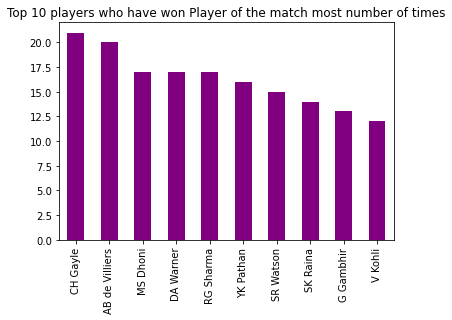

In [150]:
var=df2['player_of_match'].value_counts().head(10)
var.plot.bar(color='purple')
plt.title('Top 10 players who have won Player of the match most number of times')
plt.show()

# 11) Find the player who was awarded as player of the match maximum times

In [63]:
x=df2['player_of_match'].value_counts().idxmax()
print('player who was awarded as player of the match maximum times is: ',x)


player who was awarded as player of the match maximum times is:  CH Gayle


# 12) Find the Venue where the team won the match by highest runs

In [64]:
x=df2['venue'].loc[df2['win_by_runs'].idxmax()]
print('venue where the team won the match by highest runs is :',x)

venue where the team won the match by highest runs is : Feroz Shah Kotla


# 13) Find the Venue where the team won the match by lowest runs.

In [65]:
df3=df2.loc[df2['win_by_runs']!=0]

y=df3['venue'].loc[df3['win_by_runs']==1]
print('All venues where a team has won by least amount of runs are: ')
print(y)

All venues where a team has won by least amount of runs are: 
58             Rajiv Gandhi International Stadium, Uppal
105                                     Wankhede Stadium
163                                New Wanderers Stadium
344                                     Feroz Shah Kotla
350                           Subrata Roy Sahara Stadium
518                      MA Chidambaram Stadium, Chepauk
598                                     Feroz Shah Kotla
614    Punjab Cricket Association IS Bindra Stadium, ...
734                               M. Chinnaswamy Stadium
755                   Rajiv Gandhi Intl. Cricket Stadium
Name: venue, dtype: object


# 14) Find the Umpires who did umpiring maximum times


In [66]:
x=df2['umpire1'].value_counts().idxmax()
y=df2['umpire2'].value_counts().idxmax()
z=df2['umpire3'].value_counts().idxmax()
newz=df2['umpire3'].loc[df2['umpire3']!='no third umpire'].value_counts().idxmax()
print('Umpires who did umpiring maximum times are :')
print(x)
print(y)
print(newz)

Umpires who did umpiring maximum times are :
HDPK Dharmasena
C Shamshuddin
Nitin Menon


# 15) Find the Total matches played in each season

In [67]:
x=df2.season.value_counts()
x.sort_values()

2014    53
2009    57
2008    58
2017    59
2015    59
2010    60
2016    60
2018    60
2019    60
2011    73
2012    74
2013    76
Name: season, dtype: int64

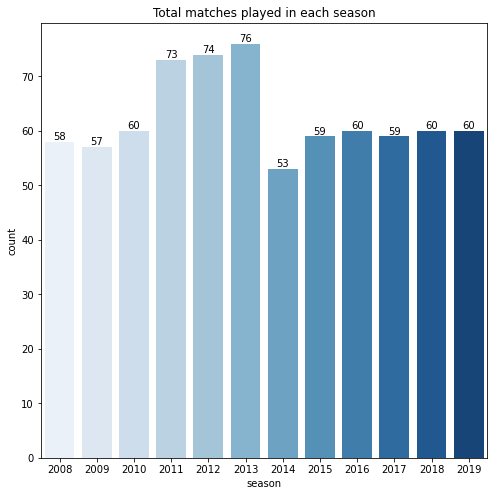

In [147]:
plt.figure(figsize=(8,8))
plot=sns.countplot(x='season',data=df2,palette='Blues')
plot.bar_label(plot.containers[0])
plt.title('Total matches played in each season')
plt.show()

In [69]:
# merging deliveries and matches datasets

newdf=pd.merge(df2,df1,how="outer",on=["id"])
newdf

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
1,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
2,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,4,0,4,no player dismissed,not out,not out
3,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
4,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,2,2,no player dismissed,not out,not out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,1,no player dismissed,not out,not out
179074,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
179075,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,1,1,no player dismissed,not out,not out
179076,477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,1,no player dismissed,not out,not out


In [70]:
# Here matches with id= 462,463,467,469,470,475,477 will show na. As we have removed the data with these id's from matches dataset as there was missing data(city was absent for these id's)  in the matches dataset
# Hence we will remove data for these id's from new merged data also.

newdf.dropna(subset=['season'],inplace=True)
newdf

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
1,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
2,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,4,0,4,no player dismissed,not out,not out
3,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,0,0,no player dismissed,not out,not out
4,1,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,0,0,0,0,0,2,2,no player dismissed,not out,not out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177373,11415,2019.0,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0.0,...,0,0,0,0,1,0,1,no player dismissed,not out,not out
177374,11415,2019.0,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0.0,...,0,0,0,0,2,0,2,no player dismissed,not out,not out
177375,11415,2019.0,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0.0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
177376,11415,2019.0,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0.0,...,0,0,0,0,2,0,2,no player dismissed,not out,not out


In [71]:
convert={'season':int}
newdf = newdf.astype(convert)


In [96]:
newdf.isnull().any()

id                  False
season              False
city                False
date                False
team1               False
team2               False
toss_winner         False
toss_decision       False
result              False
dl_applied          False
winner              False
win_by_runs         False
win_by_wickets      False
player_of_match     False
venue               False
umpire1             False
umpire2             False
umpire3             False
inning              False
batting_team        False
bowling_team        False
over                False
ball                False
batsman             False
non_striker         False
bowler              False
is_super_over       False
wide_runs           False
bye_runs            False
legbye_runs         False
noball_runs         False
penalty_runs        False
batsman_runs        False
extra_runs          False
total_runs          False
player_dismissed    False
dismissal_kind      False
fielder             False
dtype: bool

# 16) Find the Total runs in each season


In [72]:
#totalruns=pd.crosstab(index=newdf.season,columns=newdf.total_runs.sum())
#totalruns

In [73]:
totalruns=newdf.groupby(by='season').total_runs.sum()
totalruns

season
2008    17937
2009    16353
2010    18883
2011    21154
2012    22453
2013    22602
2014    16867
2015    18353
2016    18862
2017    18786
2018    20706
2019    20270
Name: total_runs, dtype: int64

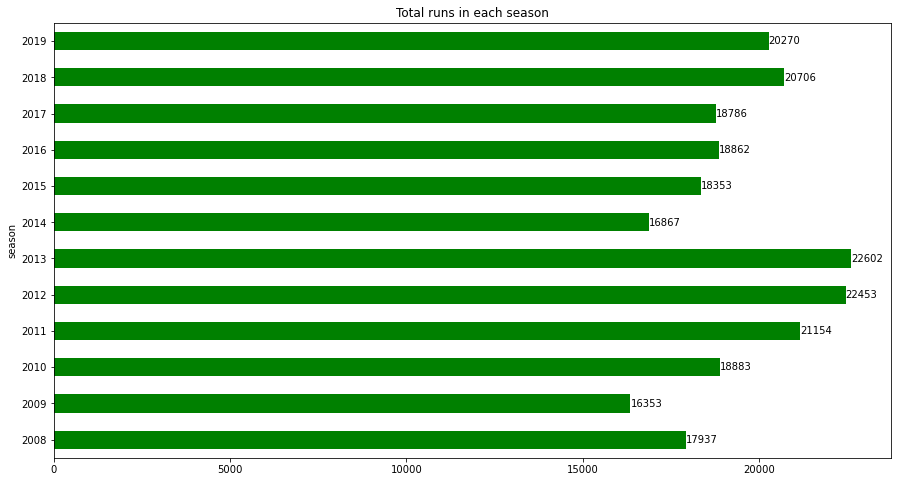

In [140]:
plt.figure(figsize=(15,8))
totalruns=newdf.groupby(by='season').total_runs.sum()
plot=totalruns.plot.barh(color='green')
plot.bar_label(plot.containers[0])
plt.title('Total runs in each season')
plt.show()

# 17) No. of tosses won by each team

In [141]:
x=df2['toss_winner'].value_counts()
x

Mumbai Indians                 96
Kolkata Knight Riders          91
Chennai Super Kings            89
Royal Challengers Bangalore    80
Kings XI Punjab                80
Delhi Daredevils               80
Rajasthan Royals               79
Sunrisers Hyderabad            45
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

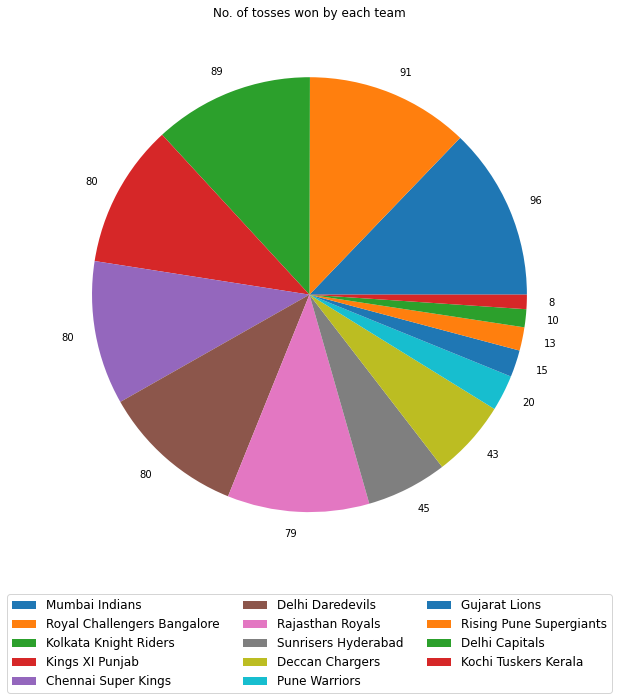

In [142]:
plt.figure(figsize=(10, 10))
x=df2['toss_winner'].value_counts()
plt.pie(x,labels=x)
mylabels = [ 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab','Chennai Super Kings'
,'Delhi Daredevils','Rajasthan Royals','Sunrisers Hyderabad','Deccan Chargers'
,'Pune Warriors','Gujarat Lions','Rising Pune Supergiants','Delhi Capitals'
,'Kochi Tuskers Kerala' ]
plt.legend(labels=mylabels, fontsize=12, loc='upper center',bbox_to_anchor=(0.5, -0.04),ncol=3)
plt.title('No. of tosses won by each team')
plt.show()

# 18) Visualize the Toss decision across seasons

In [76]:
x=pd.crosstab(df2.season,df2.toss_decision)
x

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,16,37
2015,25,34
2016,11,49


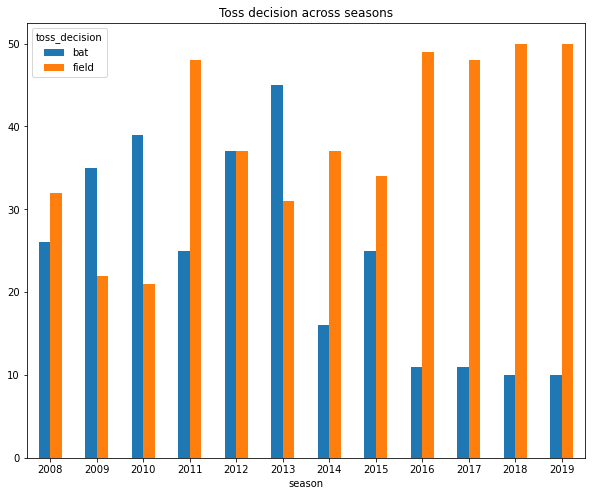

In [158]:
x=pd.crosstab(df2.season,df2.toss_decision)
y=x.plot.bar(figsize=(10,8),rot=0)
y.set_title('Toss decision across seasons')
plt.show()


# OR

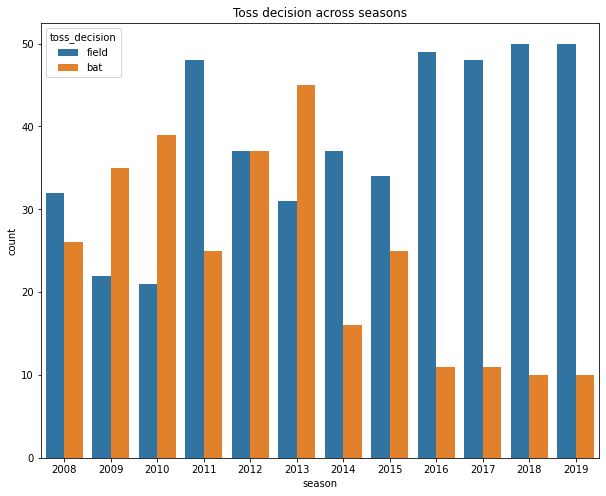

In [159]:
plt.figure(figsize=(10,8))
sns.countplot(x='season',hue='toss_decision',data=df2)
plt.title('Toss decision across seasons')
plt.show()

# 19) Find the Dismissal Kind and Visualize using best fit graph

In [79]:
ndf=df1.drop(df1[df1['dismissal_kind'] == "not out"].index)
x=ndf['dismissal_kind'].value_counts()
x

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

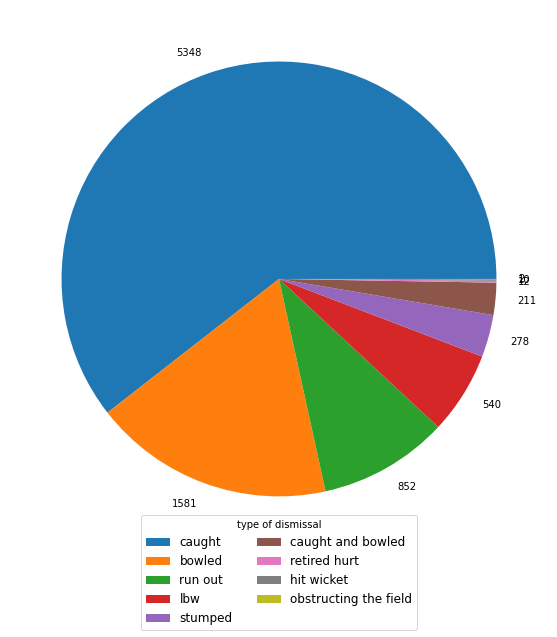

In [80]:
plt.figure(figsize=(10,10))
mylabels = ['caught','bowled','run out','lbw','stumped','caught and bowled','retired hurt','hit wicket','obstructing the field']
plt.pie(x,labels=x)
plt.legend(title='type of dismissal',labels=mylabels,loc='center',fontsize=12,bbox_to_anchor=(0.5, -0.04),ncol=2)
plt.show()

# 20) Find the Top 10 run scorers in IPL and Visualize using best fit graph

In [81]:
batsman=newdf.groupby('batsman').batsman_runs.sum()
top=batsman.sort_values(ascending=False).head(10)
top

batsman
V Kohli           5430
SK Raina          5410
RG Sharma         4861
DA Warner         4618
S Dhawan          4593
CH Gayle          4540
MS Dhoni          4458
RV Uthappa        4391
AB de Villiers    4366
G Gambhir         4223
Name: batsman_runs, dtype: int64

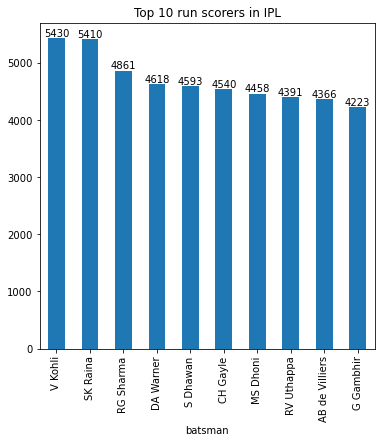

In [163]:
batsman=newdf.groupby('batsman').batsman_runs.sum()
top=batsman.sort_values(ascending=False).head(10)
plt.figure(figsize=(6,6))
plot=top.plot.bar()
plot.bar_label(plot.containers[0])
plt.title('Top 10 run scorers in IPL')
plt.show()

# 21) Visualize the Highest MOM award winners

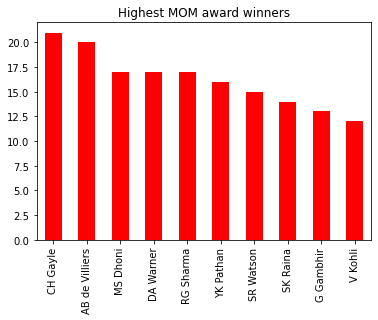

In [164]:
x=df2['player_of_match'].value_counts().head(10)
x.plot.bar(color='red')
plt.title('Highest MOM award winners')
plt.show()

# 22) Find Total Number of Played Matches by each team

In [172]:
x = df2['team1'].value_counts()
y = df2['team2'].value_counts()
z = x + y
n=z.sort_values(ascending=False)
print("total number of matches played by each team across all seasons is: \n",n)

total number of matches played by each team across all seasons is: 
 Mumbai Indians                 184
Royal Challengers Bangalore    178
Kolkata Knight Riders          177
Kings XI Punjab                175
Chennai Super Kings            162
Delhi Daredevils               159
Rajasthan Royals               146
Sunrisers Hyderabad            106
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiants         30
Delhi Capitals                  16
Kochi Tuskers Kerala            14
dtype: int64


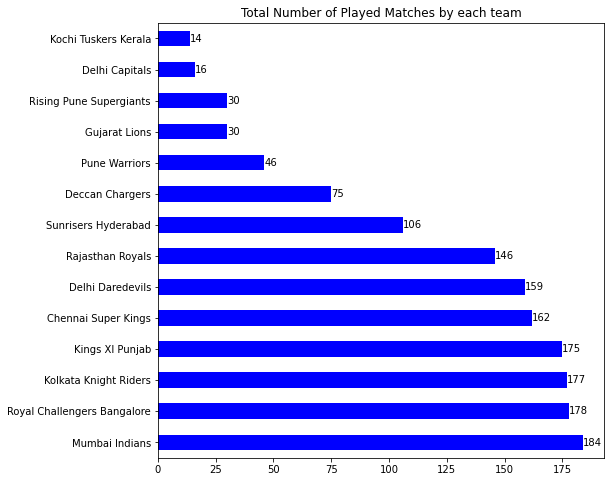

In [173]:
plt.figure(figsize=(8,8))
plot=n.plot.barh(color='blue')
plot.bar_label(plot.containers[0])
plt.title('Total Number of Played Matches by each team')
plt.show()

# 23) Compare Total Played Matches vs Winning Matches vs Win Rate

In [85]:
data=pd.DataFrame()
data

""


In [86]:
totalmatches1 = df2['team1'].value_counts()
totalmatches2 = df2['team2'].value_counts()
total = totalmatches1+totalmatches2
wincount=df2['winner'].value_counts()
winrate=(wincount/total)*100
data['totalmatches']=total
data['winmatches']=wincount
data['winrate']=winrate
data

,totalmatches,winmatches,winrate
Chennai Super Kings,162,98,60.493827
Deccan Chargers,75,29,38.666667
Delhi Capitals,16,10,62.500000
Delhi Daredevils,159,66,41.509434
Gujarat Lions,30,13,43.333333
Kings XI Punjab,175,81,46.285714
Kochi Tuskers Kerala,14,6,42.857143
Kolkata Knight Riders,177,92,51.977401
Mumbai Indians,184,109,59.239130
Pune Warriors,46,12,26.086957


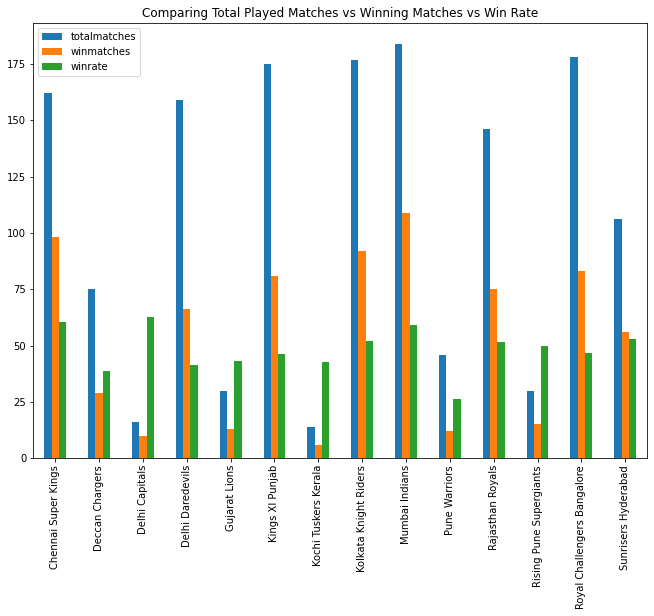

In [87]:
data.plot.bar(figsize=(11,8),title='Comparing Total Played Matches vs Winning Matches vs Win Rate')
plt.show()

# 24) Find the Distribution of Won the Matches

In [88]:
x=df2['winner'].value_counts()
x

Mumbai Indians                 109
Chennai Super Kings             98
Kolkata Knight Riders           92
Royal Challengers Bangalore     83
Kings XI Punjab                 81
Rajasthan Royals                75
Delhi Daredevils                66
Sunrisers Hyderabad             56
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
no winner                        4
Name: winner, dtype: int64

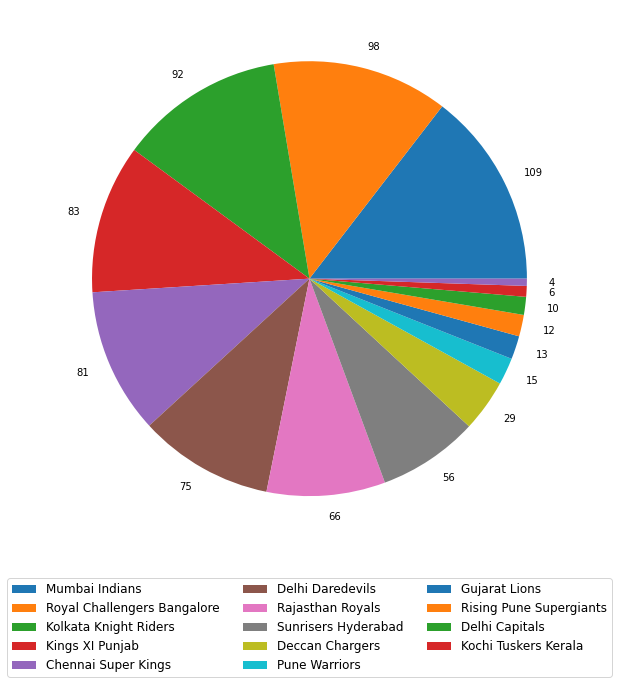

In [89]:
plt.figure(figsize=(10,10))
plt.pie(x,labels=x)
mylabels = [ 'Mumbai Indians','Royal Challengers Bangalore','Kolkata Knight Riders','Kings XI Punjab','Chennai Super Kings'
,'Delhi Daredevils','Rajasthan Royals','Sunrisers Hyderabad','Deccan Chargers'
,'Pune Warriors','Gujarat Lions','Rising Pune Supergiants','Delhi Capitals'
,'Kochi Tuskers Kerala' ]
plt.legend(labels=mylabels, fontsize=12, loc='upper center',bbox_to_anchor=(0.5, -0.04),ncol=3)
plt.show()

# 25) Ratio between Total Matches and Win Matches

In [90]:
x= df2.city.value_counts().sum()
y= df2.loc[df2['result']=='normal'].value_counts().sum()
z=x/y
print('Total matches: ',x)
print('Matches won: ',y)
print('ratio= ',y,'/',x)
print('ratio= ',z)

Total matches:  749
Matches won:  736
ratio=  736 / 749
ratio=  1.017663043478261


# 26) What is the choice of each team after winning the toss?

In [91]:
n=pd.crosstab(df2.toss_winner,df2.toss_decision)
n

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,48,41
Deccan Chargers,24,19
Delhi Capitals,2,8
Delhi Daredevils,29,51
Gujarat Lions,1,14
Kings XI Punjab,26,54
Kochi Tuskers Kerala,3,5
Kolkata Knight Riders,29,62
Mumbai Indians,43,53


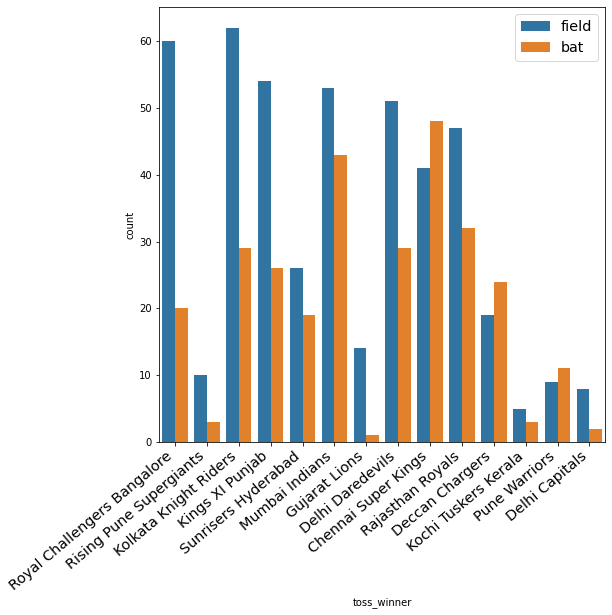

In [171]:
plt.figure(figsize=(8,8))
x = sns.countplot(x='toss_winner', hue='toss_decision', data=df2)

x.set_xticklabels(x.get_xticklabels(), rotation=40, ha="right",
    fontweight='light',
    fontsize='x-large')
x.legend(loc="upper right",fontsize='x-large')

# OR

<AxesSubplot:xlabel='toss_winner'>

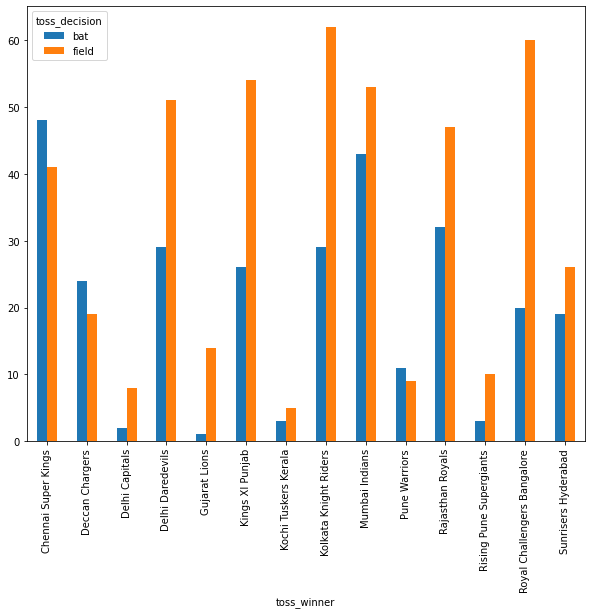

In [93]:
n.plot.bar(figsize=(10,8))